# This is an attempt to show how to build waves and use FFTs

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

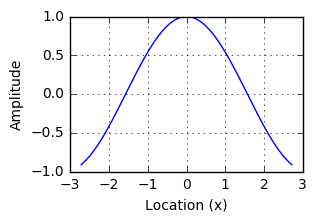

In [22]:
#A Simple Wave
x = np.linspace(-np.e, np.e, 201)
y = np.cos(x)

plt.figure(figsize = (3, 2))
plt.plot(x, y, 'b-')
plt.ylabel('Amplitude')
plt.xlabel('Location (x)')
plt.grid('on')
plt.show()

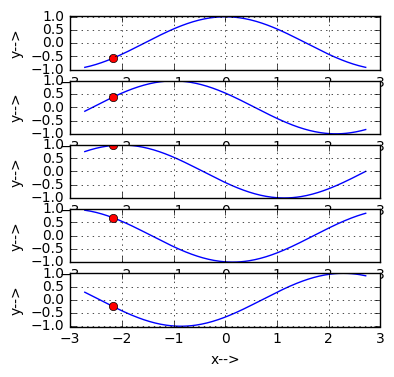

In [31]:
#Space and Time

timestep = np.arange(5)
fig = plt.figure(figsize = (4,4))

for t in timestep:
    plt.subplot(len(timestep),1,t+1)
    y=np.cos(x+t)
    plt.plot(x,y,'b')
    plt.plot(x[20],y[20],'ro')
    plt.ylim(-1.01, 1.01)
    plt.ylabel('y-->')
    plt.grid('on')

plt.xlabel('x-->')
plt.show()

__Build a wave__

when we record a wave we need to specify how often to sample.

$\omega = 2\pi*f $

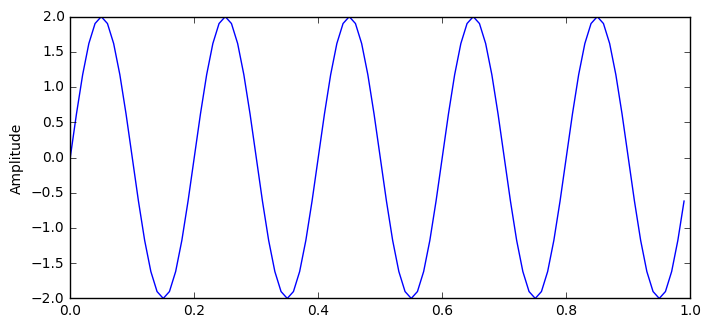

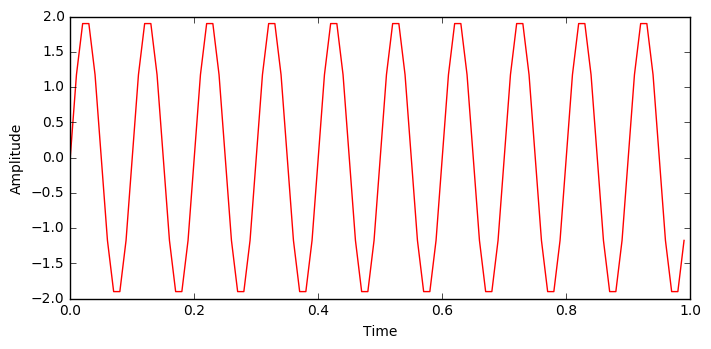

In [50]:
samp_rate = 100

amp =[2, 2] # amplitudes
freq = [5, 10] #list of frequencies in Hz
phase = [0, 0] #phase 

#sampling interval
t_sr = 1.0/samp_rate

t = np.arange(0,1,t_sr) #will split the interval from [0,1] with a step of t_sr

#Define the wave fully
y1 = amp[0]*np.sin(2*np.pi*freq[0]*t + phase[0])

plt.figure(figsize = (8, 8))
plt.subplot(211)
plt.plot(t, y1, 'b')
plt.ylabel('Amplitude')

#Define the wave fully
y2 = amp[1]*np.sin(2*np.pi*freq[1]*t + phase[1])

plt.figure(figsize = (8, 8))
plt.subplot(212)
plt.plot(t, y2, 'r')
plt.ylabel('Amplitude')

plt.xlabel('Time')
plt.show()


__# Complex Wave Generation # __


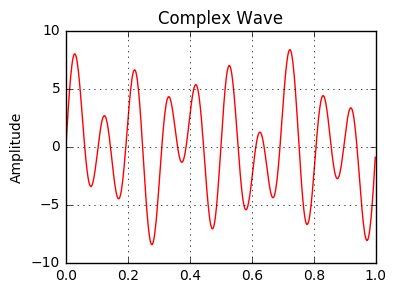

In [76]:
samp_rate = 512

amp =[1, 3, 5] # amplitudes
freq = [3,  6 , 10] #list of frequencies in Hz
phase = [0, 0, 0] #phase 

#sampling interval
t_sr = 1.0/samp_rate

t = np.arange(0,1,t_sr) #will split the interval from [0,1] with a step of t_sr

y = np.zeros(len(t))

for step in range(len(amp)):
    y = y + amp[step]*np.sin(2*np.pi*freq[step]*t + phase[step]) 

plt.figure(figsize = (4, 3))
plt.plot(t, y, 'r')
plt.ylabel('Amplitude')
plt.grid('on')
plt.title('Complex Wave')
plt.show()

**Build a simple FFT**
_Note the recursion that causes the FFT to run in O(nlogn) instead of O(n^2)_

In [96]:
#Needs to pass in data which is a power of 2
def fft_raw(x):
    
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = FFT(x[0::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate([X_even+factor[:int(N/2)]*X_odd, X_even+factor[int(N/2):]*X_odd])
        return X

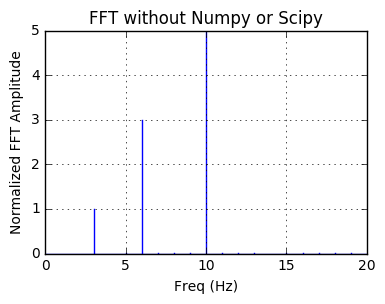

In [98]:
X = fft_raw(y)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/samp_rate
freq = n/T 

# Get the one-sided specturm
n_oneside = N/2
# get the one side frequency
f_oneside = freq[:n_oneside]
# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (4, 3))
plt.stem(f_oneside, abs(X_oneside), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude')
plt.tight_layout()
plt.grid('on')
plt.title('FFT without Numpy or Scipy')
plt.xlim(0,20)
plt.show()

Let's try the FFT from Numpy

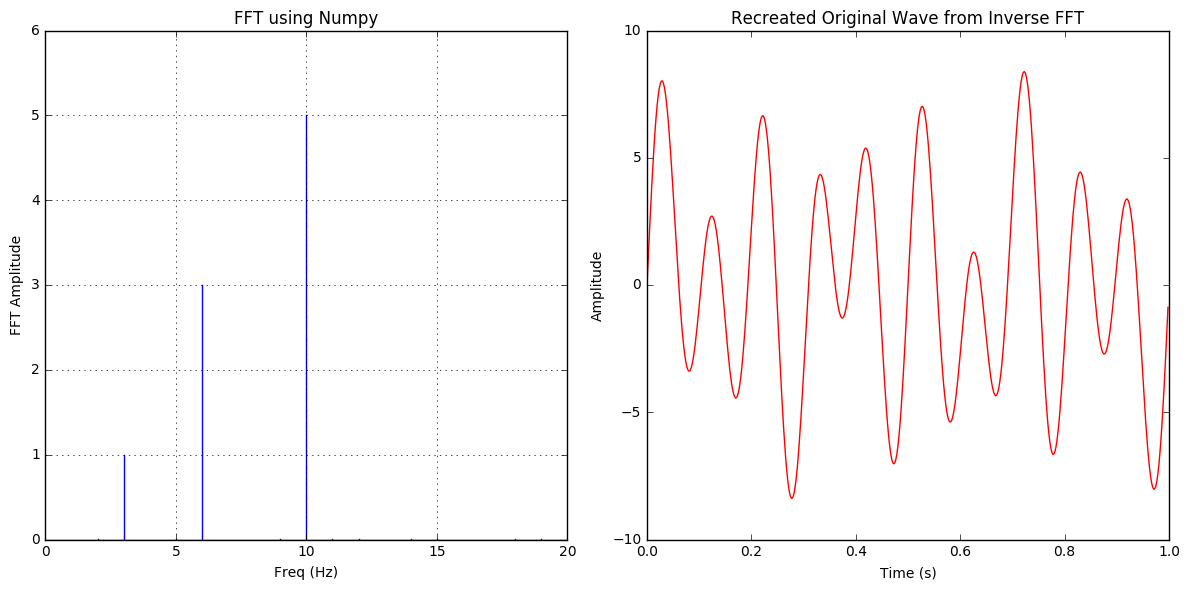

In [102]:
from numpy.fft import fft, ifft

X = fft(y)
N = len(X)
n = np.arange(N)
T = N/samp_rate
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X)/(N//2), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude')
plt.title('FFT using Numpy')
plt.grid('on')
plt.xlim(0, 20)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Recreated Original Wave from Inverse FFT')
plt.tight_layout()
plt.show()